In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [2]:
data_loc = "D:/Beam Characterization/2019_5_8/"
fname = "2019_05_08_UV_intensity_no_sweep.hdf"

In [3]:
with h5py.File(data_loc+fname, 'r') as f:
    runs = list(f.keys())
    for name in f.keys():
        print(name)

1557342346 UV_intensity
1557343475 new_spot
1557343585 uv_power


In [4]:
uv_intensity = "20.5 20 4.9 20.3 7.5 20 10 20.4 12.5 20.3 14.9 20 25.2 19.7 30.2 40.3 20.4 49".split(' ')
uv_intensity = [float(val) for val in uv_intensity]

run_name = '1557342346 UV_intensity'
fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    print('run description :',grp.attrs['run_description'])
    wavemeter = readout['Bristol671A'].value
    fast_start = grp.attrs['time_offset']
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

run description : UV intensity Q23


In [5]:
# check when yag fires
yag_fire = [idx for idx in range(1,len(fast_daq)) if fast_daq['PXIe5171_{0}'.format(idx)][:,5].max() > 300]

# integrating the pmt signal and subtracting the background
integrals = []
dx = 1/1e5 # 100 kHz acquisition rate
for idx in yag_fire:
    if fast_daq['PXIe5171_{0}'.format(idx)][:,4].min() > 100:
        data_f = fast_daq['PXIe5171_{0}'.format(idx)][:,2]
        background = np.trapz(data_f[:100], dx=dx)
        signal = np.trapz(data_f[200:1100], dx=dx)-9*background
        integrals.append((idx,signal*-1,background*-1))
integrals = np.array(integrals)

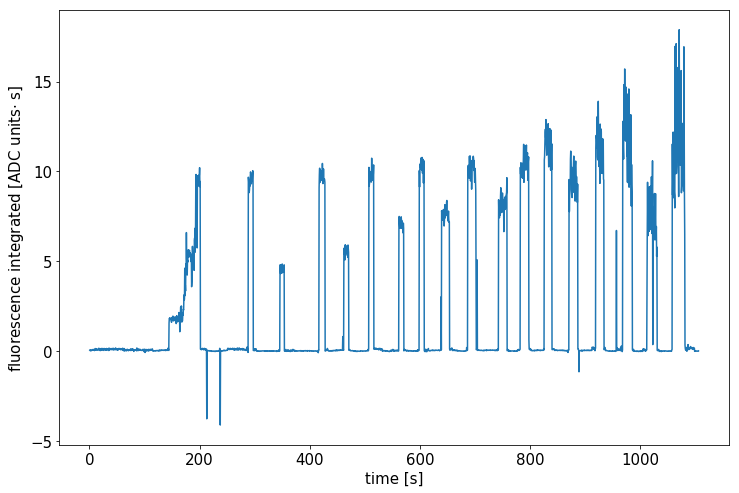

In [6]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(integrals[:,0]*1/2, integrals[:,1])

ax.set_xlabel('time [s]', fontsize = 15)
ax.set_ylabel('fluorescence integrated [ADC units$\cdot$ s]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)

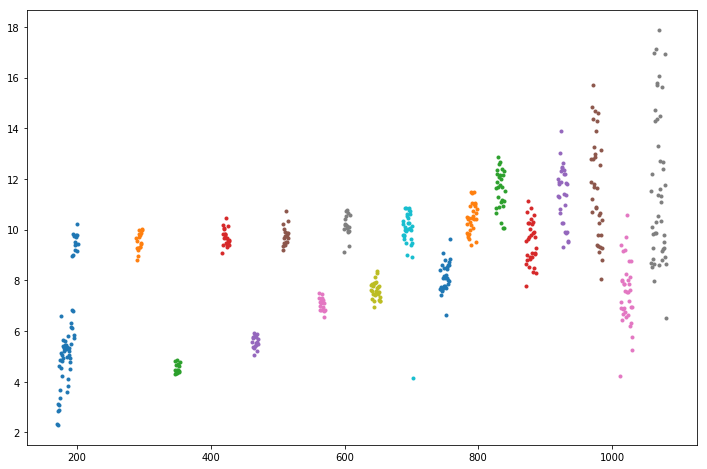

In [7]:
# group integrated signals by uv intensity
import more_itertools as mit
grouped_by_intensity = [list(group) for group in mit.consecutive_groups(np.where(integrals[:,1] > 2)[0])]

# some filtering of groups
grouped_by_intensity = [g for g in grouped_by_intensity if len(g) > 10]

tmp = [grouped_by_intensity[0]]
idx = 1
while True:
    if idx == len(grouped_by_intensity):
        break
    group = grouped_by_intensity[idx]
    group_p = grouped_by_intensity[idx-1]
    if (group[0] - group_p[-1]) < 10:
        tmp[-1].extend(group)
    else:
        tmp.append(group)
    idx += 1

grouped_by_intensity = tmp

fig, ax = plt.subplots(figsize = (12,8))
for group in grouped_by_intensity:
    ax.plot(integrals[:,0][group]*1/2, integrals[:,1][group], '.')

In [8]:
intensity_signal = []
for intensity, group in zip(uv_intensity[1:], grouped_by_intensity[1:]):
    mean = np.mean(integrals[:,1][group])
    stderr = np.std(integrals[:,1][group])
    intensity_signal.append((intensity, mean, stderr))

In [9]:
# list of tuples with indices, first index specifies a power in the intensity_signal list, the second index corresponds 
# to the corresponding 20mW normalization measurement
normalize_by = [(1,0), (3,2), (5,4), (7,6), (9,8), (11,10), (13,12), (14,15), (16,15)]

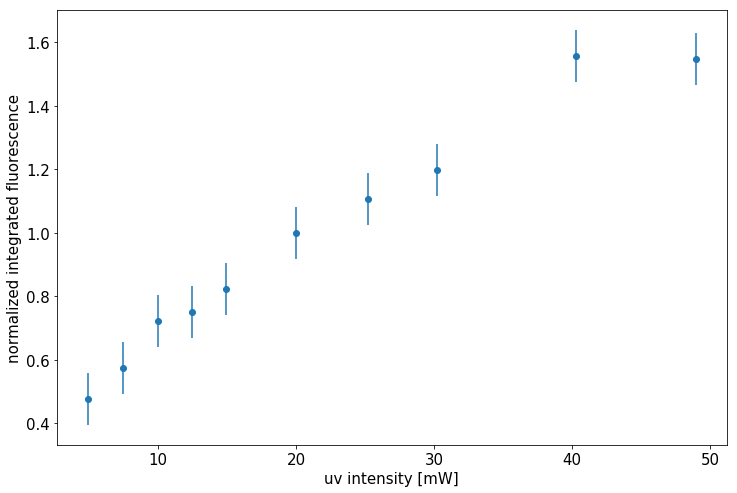

In [10]:
# normalize every integrated signal size by the previous 20 mJ uv intensity
signal_normalized = []
for indices in normalize_by:
    a,b = indices
    intensity = intensity_signal[a][0]
    ratio = intensity_signal[a][1]/intensity_signal[b][1] 
    signal_normalized.append((intensity, ratio))

tmp = []
for ida, idb in zip(normalize_by[1:], normalize_by[:-1]):
    a,b = ida[1], idb[1]
    intensity = intensity_signal[a][0]
    ratio = intensity_signal[a][1]/intensity_signal[b][1] 
    tmp.append(ratio)
signal_normalized.append((20, np.mean(ratio)))
        
fig, ax = plt.subplots(figsize = (12,8))
ax.errorbar([val[0] for val in signal_normalized], [val[1] for val in signal_normalized], yerr = np.std(tmp)*np.ones(len(signal_normalized)), fmt = '.', ms = 12)
ax.set_xlabel('uv intensity [mW]', fontsize = 15)
ax.set_ylabel('normalized integrated fluorescence', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)

In [11]:
normalized_spot_one = signal_normalized.copy()
std_spot_one = np.std(tmp)

## Second Run

In [12]:
uv_intensity = "20 47 20.5 39.5 19.6 30 20.3 24.9 19.9 15 19.8 12.5 20.1 9.9 20.5 7.3 20.4 5".split(' ')
uv_intensity = [float(val) for val in uv_intensity]

run_name = '1557343585 uv_power'
fast_daq = {}
with h5py.File(data_loc+fname, 'r') as f:
    grp = f[run_name]
    readout = grp['readout']
    print('run description :',grp.attrs['run_description'])
    wavemeter = readout['Bristol671A'].value
    fast_start = grp.attrs['time_offset']
    for dset in readout['PXIe-5171'].items():
        fast_daq[dset[0]] = dset[1].value

run description : UV intensity Q23


In [13]:
# check when yag fires
yag_fire = [idx for idx in range(1,len(fast_daq)) if fast_daq['PXIe5171_{0}'.format(idx)][:,5].max() > 300]

# integrating the pmt signal and subtracting the background
integrals = []
dx = 1/1e5 # 100 kHz acquisition rate
for idx in yag_fire:
    if fast_daq['PXIe5171_{0}'.format(idx)][:,4].min() > 100:
        data_f = fast_daq['PXIe5171_{0}'.format(idx)][:,2]
        background = np.trapz(data_f[:100], dx=dx)
        signal = np.trapz(data_f[200:1100], dx=dx)-9*background
        integrals.append((idx,signal*-1,background*-1))
integrals = np.array(integrals)

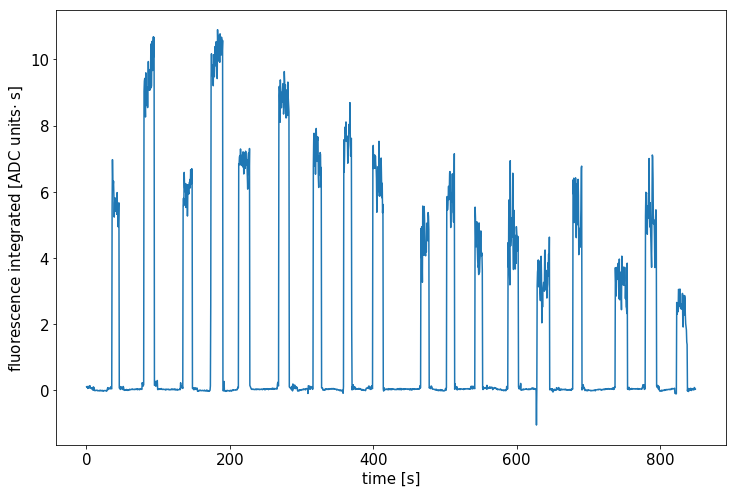

In [14]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(integrals[:,0]*1/2, integrals[:,1])

ax.set_xlabel('time [s]', fontsize = 15)
ax.set_ylabel('fluorescence integrated [ADC units$\cdot$ s]', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)

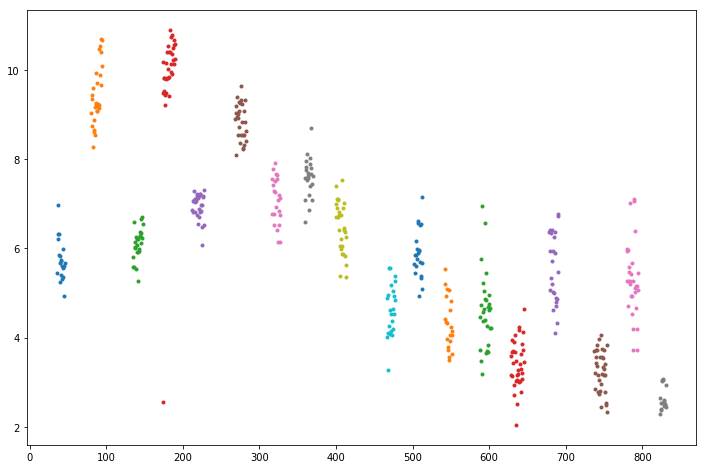

In [15]:
# group integrated signals by focal length offset
import more_itertools as mit
grouped_by_intensity = [list(group) for group in mit.consecutive_groups(np.where(integrals[:,1] > 2)[0])]

# some filtering of groups
grouped_by_intensity = [g for g in grouped_by_intensity if len(g) > 10]

tmp = [grouped_by_intensity[0]]
idx = 1
while True:
    if idx == len(grouped_by_intensity):
        break
    group = grouped_by_intensity[idx]
    group_p = grouped_by_intensity[idx-1]
    if (group[0] - group_p[-1]) < 10:
        tmp[-1].extend(group)
    else:
        tmp.append(group)
    idx += 1

grouped_by_intensity = tmp

fig, ax = plt.subplots(figsize = (12,8))
for group in grouped_by_intensity:
    ax.plot(integrals[:,0][group]*1/2, integrals[:,1][group], '.')

In [16]:
intensity_signal = []
for intensity, group in zip(uv_intensity, grouped_by_intensity):
    mean = np.mean(integrals[:,1][group])
    stderr = np.std(integrals[:,1][group])
    intensity_signal.append((intensity, mean, stderr))

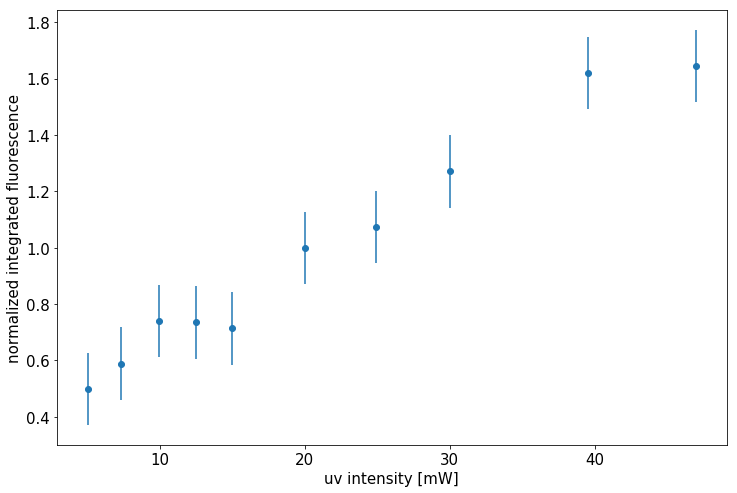

In [17]:
# normalize every integrated signal size by the previous 20 mJ uv intensity
signal_normalized = [(val[0], val[1]/val_p[1]) for val, val_p in zip(intensity_signal[1::2], intensity_signal[::2])]

# normalize every integrated signal for 20mJ uv intensity by the preciding 20mJ uv intensity
tmp = []
for val, val_p in zip(intensity_signal[2::2], intensity_signal[::2]):
    tmp.append(val[1]/val_p[1])
signal_normalized.append((20,np.mean(tmp)))
        
fig, ax = plt.subplots(figsize = (12,8))
ax.errorbar([val[0] for val in signal_normalized], [val[1] for val in signal_normalized], yerr = np.std(tmp)*np.ones(len(signal_normalized)), fmt = '.', ms = 12)
ax.set_xlabel('uv intensity [mW]', fontsize = 15)
ax.set_ylabel('normalized integrated fluorescence', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)

In [18]:
normalized_spot_two = signal_normalized.copy()
std_spot_two = np.std(tmp)

## Both Spots

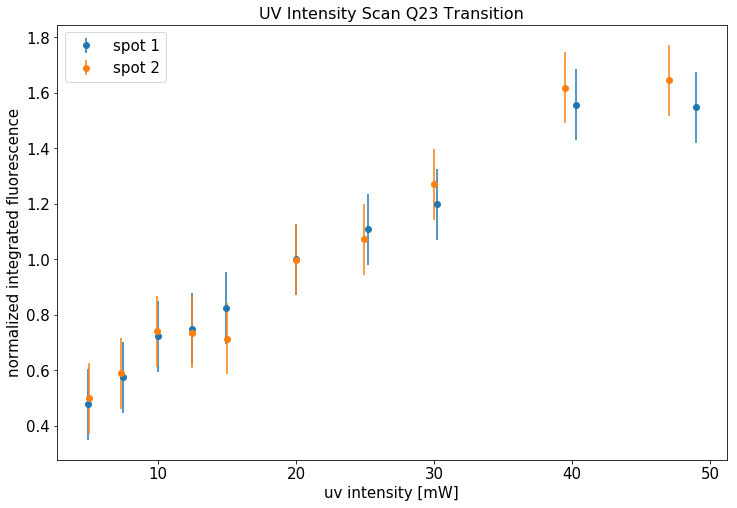

In [22]:
fig, ax = plt.subplots(figsize = (12,8))

ax.errorbar([val[0] for val in normalized_spot_one], [val[1] for val in normalized_spot_one], 
            yerr = np.std(tmp)*np.ones(len(normalized_spot_one)), fmt = '.', ms = 12, label = 'spot 1')
ax.errorbar([val[0] for val in normalized_spot_two], [val[1] for val in normalized_spot_two], 
             yerr = np.std(tmp)*np.ones(len(normalized_spot_two)), fmt = '.', ms = 12, label = 'spot 2')

ax.legend(fontsize = 15)

ax.set_title('UV Intensity Scan Q23 Transition', fontsize = 16)
ax.set_xlabel('uv intensity [mW]', fontsize = 15)
ax.set_ylabel('normalized integrated fluorescence', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.xaxis.get_offset_text().set_size(15)
fig.savefig('uv_power_scan.png')